Valor ótimo da função objetivo:  -11.0
Ponto onde a função objetiva tem valor ótimo:  [1. 5. 0. 8. 0.]


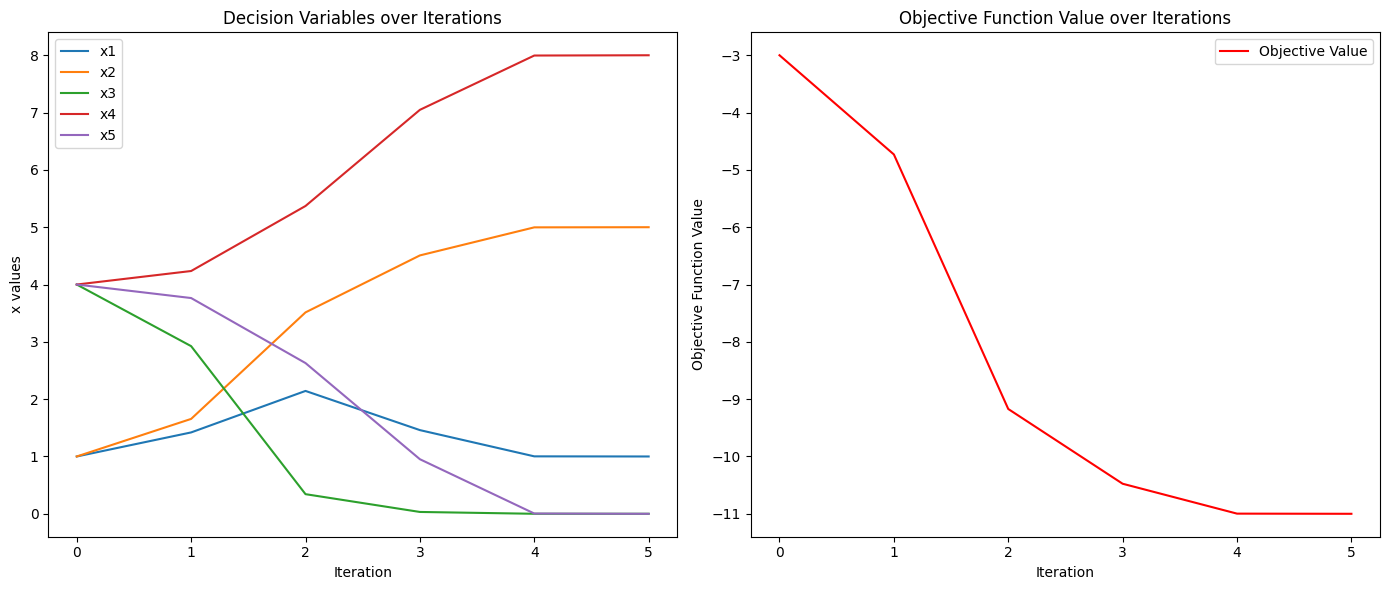

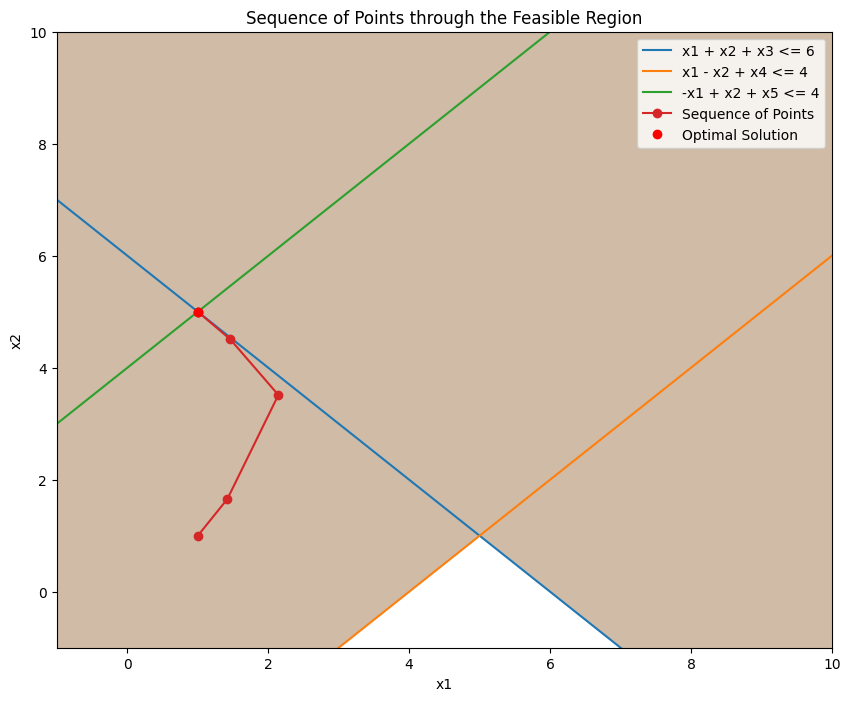

In [8]:
# Atividade de Pontos Interiores      Disciplina de Otimização Linear II    2024
# Professora: Maristela Oliveira dos Santos
# Alunos: Edilson do Carmo nº 2543883 / Hugo Gielamo Próspero nº 15404439
# Exercício 3.16  do livro do Arenales
import numpy as np
import matplotlib.pyplot as plt

def karmakar(A,c,b,x,lam,mu,eps=1e-3,k=0,kmax=20,alpha=0.1,betha=0.995,decisao=0):  #definindo o método de pontos interiores

    m, n = A.shape

    x_hist = [x] #cria uma lista para armazenar os valores de x (começando com x0)
    obj_hist = [np.dot(c, x)] #cria uma lista para armazenar os valores da função objetivo dado cada x (começando com x0)

    pp = b - A@x #factibilidade primal
    pd = c - np.transpose(A)@lam - mu #factibilidade dual
    sum = 0
    for j in range(n):
        sum = sum + x[j]*mu[j]
    delta = alpha*sum/n #folgas complementares

    normpp = np.linalg.norm (pp) #norma de pp
    normpd = np.linalg.norm (pd) #norma de pd

    if normpp<=eps and normpd <=eps and sum/n<=eps: #checa as condições de parada para a primeira iteração
        decisao = 1
    else:
        decisao = 0

    while decisao==0 and k<=kmax: #Repete as iterações enquanto as condições de parada não forem atendidas
        M = np.diag(mu)
        X = np.diag(x)
        e = np.ones(n)
        #Direção de busca
        T = X@np.linalg.inv(M) #Matriz Theta
        D = A@T@np.transpose(A) #Matriz usada para encontrar a direção de busca
        bk = pp + A@T@(pd + mu - delta*np.linalg.inv(X)@e) #vetor b(k)

        dellam, res, rank, s = np.linalg.lstsq(D,bk,rcond=None) #vetor delta lambda
        delx = T@(np.transpose(A)@dellam-pd-mu + delta*np.linalg.inv(X)@e) #vetor delta x
        delmu = -mu + delta*np.linalg.inv(X)@e - np.linalg.inv(T)@delx #vetor delta mu

        #Cálculo do passo

        dec = [1]

        for j in range(n):
            if delx[j]<0:
                dec.append(-x[j]/delx[j])
            if delmu[j]<0:
                dec.append(-mu[j]/delmu[j])

        theta = betha*min(dec)

        #Atualização das variáveis

        x = x +theta*delx
        lam = lam + theta*dellam
        mu = mu + theta*delmu
        pp = b-A@x
        pd = c - np.transpose(A)@ lam - mu
        delta = alpha*delta

        x_hist.append(x) #Armazena o novo x na lista
        cotm = np.dot(c, x) #Calcula o novo valor da função objetivo
        obj_hist.append(cotm) #Armazena o novo valor da função obj na lista

        #Verifica o critério de parada

        normpp = np.linalg.norm (pp)
        normpd = np.linalg.norm (pd)
        sum = 0
        for j in range(n):
            sum = sum + x[j]*mu[j]

        if normpp<=eps and normpd <=eps and sum/n<=eps:
            decisao = 1
        else:
            decisao = 0
        k = k+1

    return x,cotm, x_hist,obj_hist,normpp,normpd,eps

#Escrever as matrizes do problema de otimização linear na forma padrão e um x inicial factivel primal

c = np.array([-1,-2,0,0,0])
A = np.array([[1,1,1,0,0],
             [1,-1,0,1,0],
             [-1,1,0,0,1]])
b = np.array([6,4,4])

x = np.array([1,1,4,4,4])
lam = np.array([0,0,0])
mu = np.array([1,1,1,1,1])

m, n = A.shape

x, cotm, x_hist, obj_hist,normpp,normpd,eps = karmakar(A,c,b,x,lam,mu)
x = np.round(x, decimals=2)
cotm = np.round(cotm, decimals=2)

if normpp > eps:
    print("O problema de otimização dado é infactível.") 

elif normpd > eps:
    print("O problema dado não possui solução ótima.")

else:
    print("Valor ótimo da função objetivo: ", cotm)
    print("Ponto onde a função objetiva tem valor ótimo: ",x)

# Plotar os resultados
x_hist = np.array(x_hist)
iterations = range(len(x_hist))

#Plotar os valores de x

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(iterations, x_hist[:, i], label=f'x{i+1}')
plt.xlabel('Iteration')
plt.ylabel('x values')
plt.title('Decision Variables over Iterations')
plt.legend()

# Plotar a função objetivo
plt.subplot(1, 2, 2)
plt.plot(iterations, obj_hist, label='Objective Value', color='r')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value over Iterations')
plt.legend()

plt.tight_layout()
plt.show()
# Plotar a sequencia de pontos na região factível
plt.figure(figsize=(10, 8))

# Constraints for plotting
x = np.linspace(-1, 10, 400)
y1 = (b[0] - A[0, 0] * x) / A[0, 1]
y2 = (b[1] - A[1, 0] * x) / A[1, 1]
y3 = (b[2] - A[2, 0] * x) / A[2, 1]

plt.plot(x, y1, label='x1 + x2 + x3 <= 6')
plt.plot(x, y2, label='x1 - x2 + x4 <= 4')
plt.plot(x, y3, label='-x1 + x2 + x5 <= 4')

# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)
# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)

# Plot sequence of points
plt.plot(x_hist[:, 0], x_hist[:, 1], 'o-', label='Sequence of Points')

# Plot optimal solution
plt.plot(x_hist[-1, 0], x_hist[-1, 1], 'ro', label='Optimal Solution')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sequence of Points through the Feasible Region')
plt.legend()
plt.show()

Valor ótimo da função objetivo:  -6.0
Ponto onde a função objetiva tem valor ótimo:  [3. 3. 0. 4. 4.]


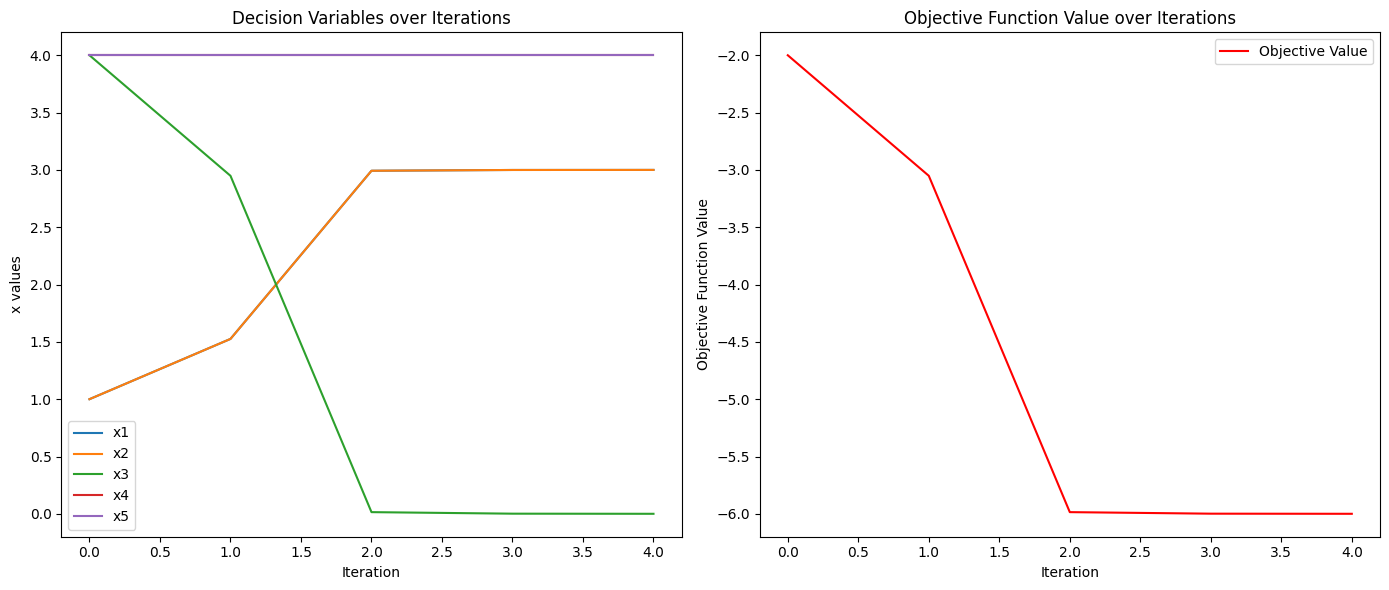

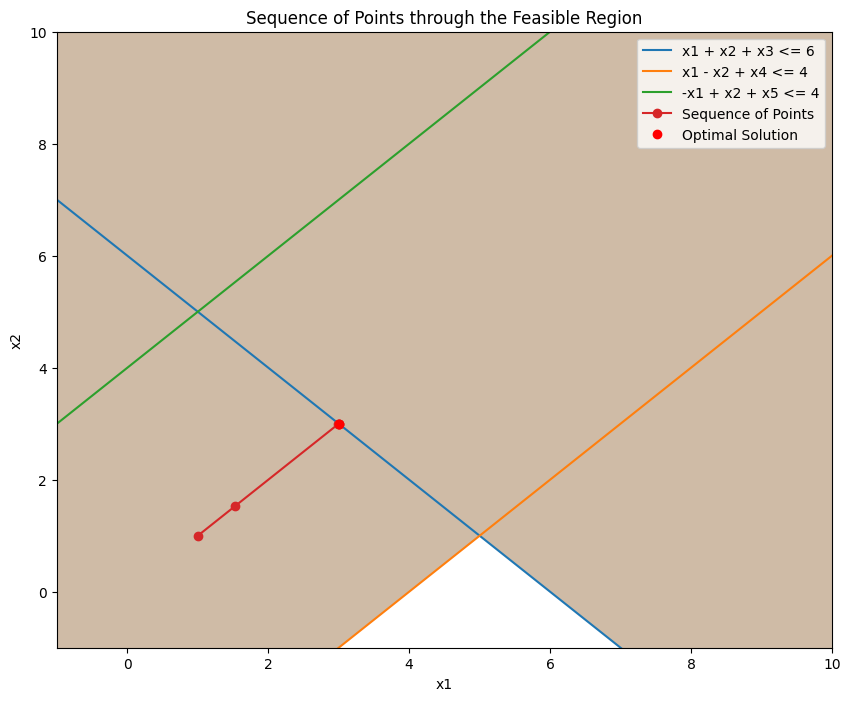

In [9]:
# Exercicio 3.16     Alteração  uso dos Métodos Númericos
c = np.array([-1,-1,0,0,0])
A = np.array([[1,1,1,0,0],
             [1,-1,0,1,0],
             [-1,1,0,0,1]])
b = np.array([6,4,4])

x = np.array([1,1,4,4,4])
lam = np.array([0,0,0])
mu = np.array([1,1,1,1,1])

m, n = A.shape

x, cotm, x_hist, obj_hist,normpp,normpd,eps = karmakar(A,c,b,x,lam,mu)
x = np.round(x, decimals=2)
cotm = np.round(cotm, decimals=2)

if normpp > eps:
    print("O problema de otimização dado é infactível.") 

elif normpd > eps:
    print("O problema dado não possui solução ótima.")

else:
    print("Valor ótimo da função objetivo: ", cotm)
    print("Ponto onde a função objetiva tem valor ótimo: ",x)

# Plotting the results
x_hist = np.array(x_hist)
iterations = range(len(x_hist))

plt.figure(figsize=(14, 6))

# Plot each component of x over iterations
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(iterations, x_hist[:, i], label=f'x{i+1}')
plt.xlabel('Iteration')
plt.ylabel('x values')
plt.title('Decision Variables over Iterations')
plt.legend()

# Plot objective function value over iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, obj_hist, label='Objective Value', color='r')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value over Iterations')
plt.legend()

plt.tight_layout()
plt.show()
# Plot the sequence of points through the feasible region
plt.figure(figsize=(10, 8))

# Constraints for plotting
x = np.linspace(-1, 10, 400)
y1 = (b[0] - A[0, 0] * x) / A[0, 1]
y2 = (b[1] - A[1, 0] * x) / A[1, 1]
y3 = (b[2] - A[2, 0] * x) / A[2, 1]

plt.plot(x, y1, label='x1 + x2 + x3 <= 6')
plt.plot(x, y2, label='x1 - x2 + x4 <= 4')
plt.plot(x, y3, label='-x1 + x2 + x5 <= 4')

# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)
# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)

# Plot sequence of points
plt.plot(x_hist[:, 0], x_hist[:, 1], 'o-', label='Sequence of Points')

# Plot optimal solution
plt.plot(x_hist[-1, 0], x_hist[-1, 1], 'ro', label='Optimal Solution')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sequence of Points through the Feasible Region')
plt.legend()
plt.show()

O problema dado não possui solução ótima.


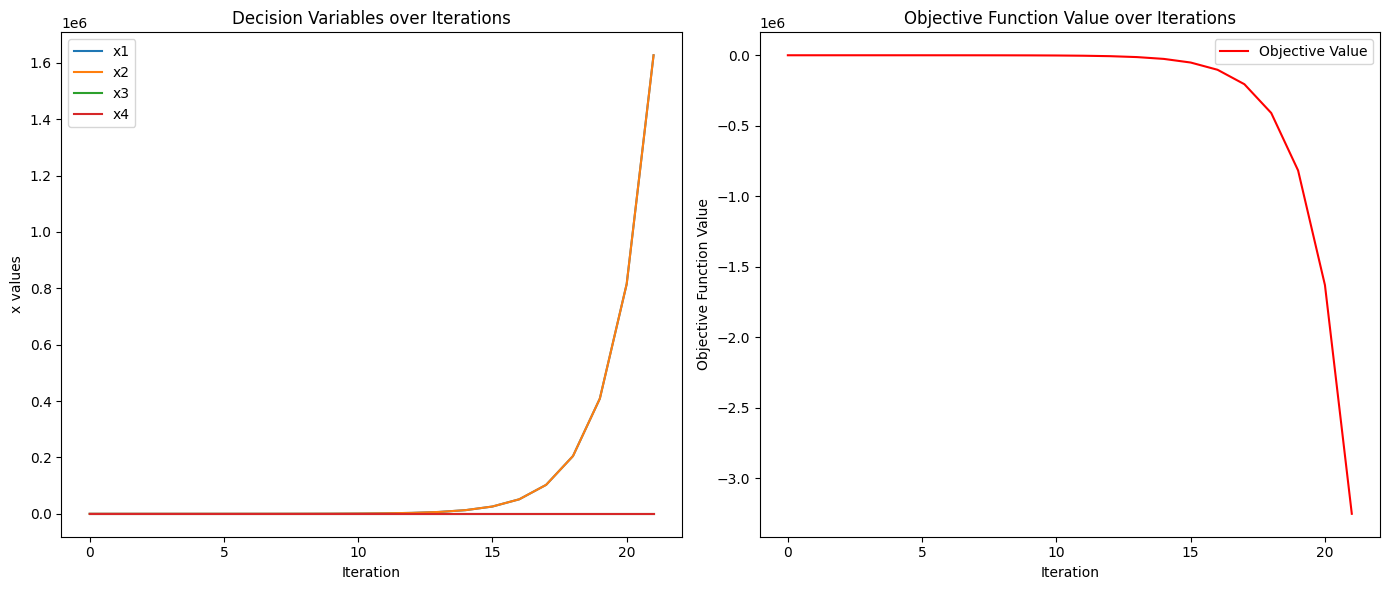

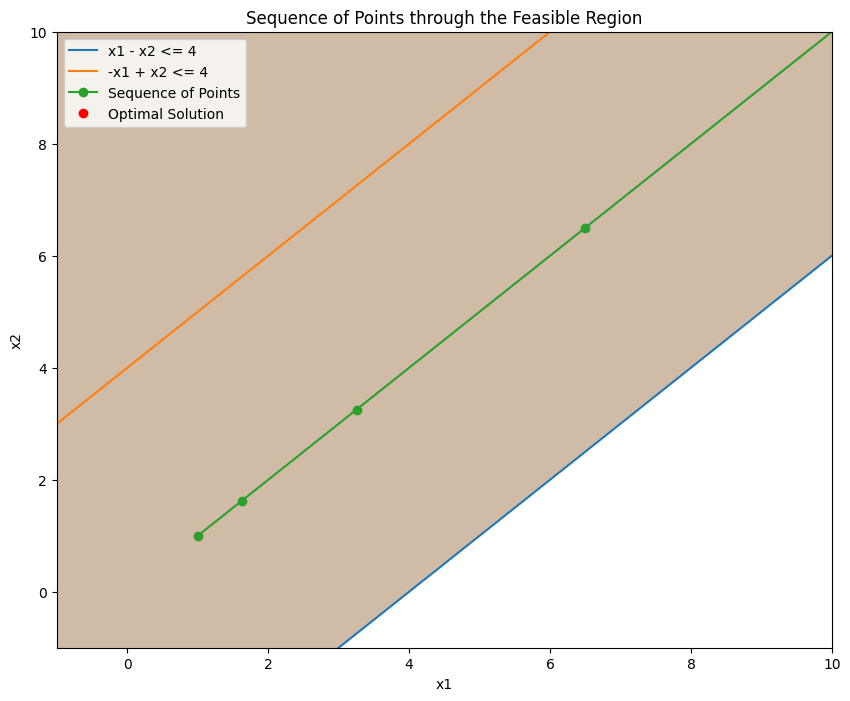

In [10]:
# Exercicio 2 dos slides de pontos interiores
import numpy as np
import matplotlib.pyplot as plt

c = np.array([-1,-1,0,0])
A = np.array([[1,-1,1,0],
             [-1,1,0,1]])
b = np.array([4,4])

x = np.array([1,1,4,4])
lam = np.array([0,0])
mu = np.array([1,1,1,1])

m, n = A.shape

x, cotm, x_hist, obj_hist,normpp,normpd,eps = karmakar(A,c,b,x,lam,mu)
x = np.round(x, decimals=2)
cotm = np.round(cotm, decimals=2)

if normpp > eps:
    print("O problema de otimização dado é infactível.") 

elif normpd > eps:
    print("O problema dado não possui solução ótima.")

else:
    print("Valor ótimo da função objetivo: ", cotm)
    print("Ponto onde a função objetiva tem valor ótimo: ",x)

# Plotting the results
x_hist = np.array(x_hist)
iterations = range(len(x_hist))

plt.figure(figsize=(14, 6))

# Plot each component of x over iterations
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(iterations, x_hist[:, i], label=f'x{i+1}')
plt.xlabel('Iteration')
plt.ylabel('x values')
plt.title('Decision Variables over Iterations')
plt.legend()

# Plot objective function value over iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, obj_hist, label='Objective Value', color='r')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value over Iterations')
plt.legend()

plt.tight_layout()
plt.show()
# Plot the sequence of points through the feasible region
plt.figure(figsize=(10, 8))

# Constraints for plotting
x = np.linspace(-1, 10, 400)
y1 = (b[0] - A[0, 0] * x) / A[0, 1]
y2 = (b[1] - A[1, 0] * x) / A[1, 1]

plt.plot(x, y1, label='x1 - x2 <= 4')
plt.plot(x, y2, label='-x1 + x2 <= 4')

# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)
# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)

# Plot sequence of points
plt.plot(x_hist[:, 0], x_hist[:, 1], 'o-', label='Sequence of Points')

# Plot optimal solution
plt.plot(x_hist[-1, 0], x_hist[-1, 1], 'ro', label='Optimal Solution')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sequence of Points through the Feasible Region')
plt.legend()
plt.show()

Valor ótimo da função objetivo:  0.0
Ponto onde a função objetiva tem valor ótimo:  [0. 0. 4. 6. 3.]


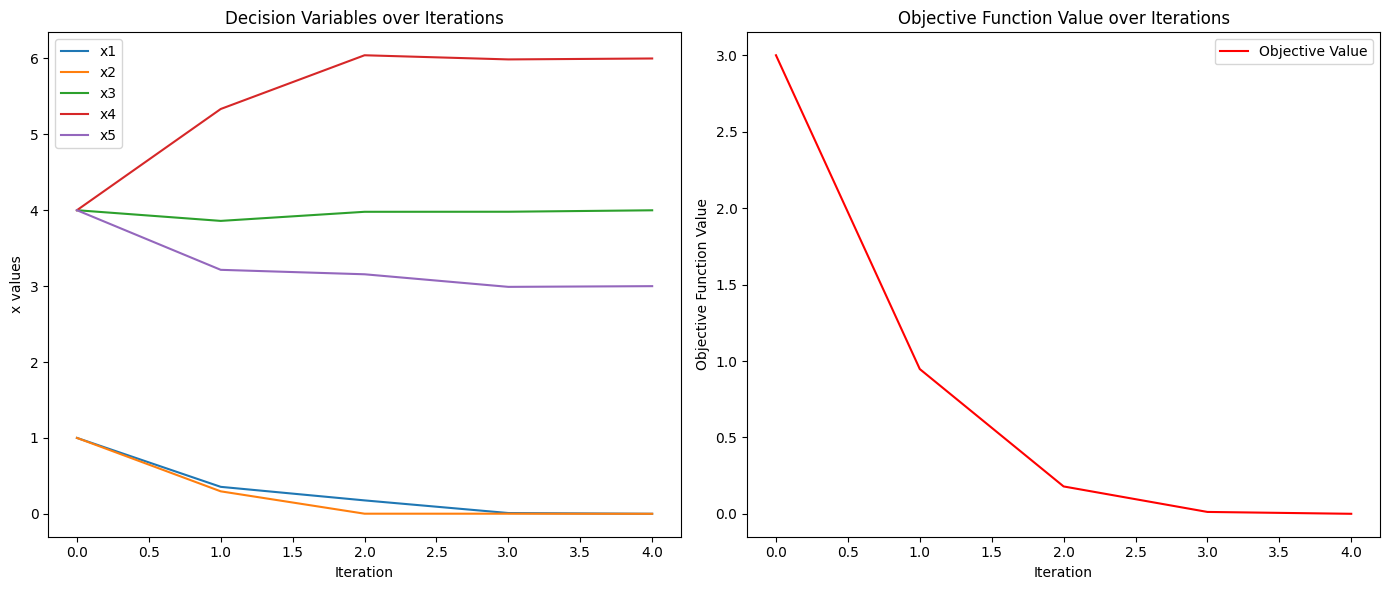

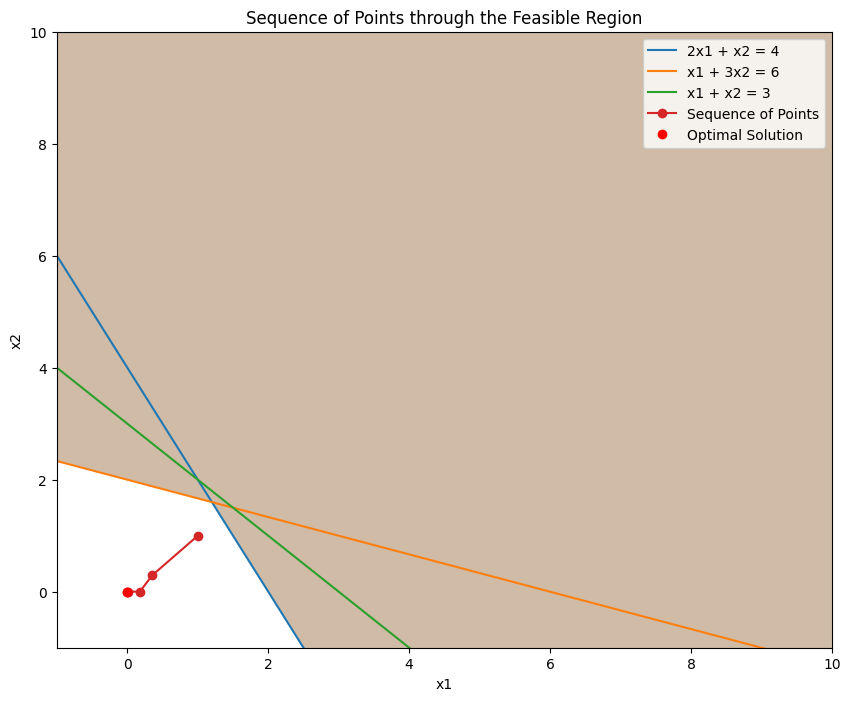

In [14]:
# Exercicio com variáveis de folga
# x1 + 2X2
# Restrições 2x1 + x2 <= 4  , x1 + 3x2 < = 6 , x1 + x2 < = 3
import numpy as np
import matplotlib.pyplot as plt

c = np.array([1, 2,0,0,0])
A = np.array([[2,1,1,0,0],
             [1,3,0,1,0],
             [1,1,0,0,1]
              ])
b = np.array([4,6,3])

x = np.array([1,1,4,4,4])
lam = np.array([0,0,0])
mu = np.array([1,1,1,1,1])

m, n = A.shape

x, cotm, x_hist, obj_hist,normpp,normpd,eps = karmakar(A,c,b,x,lam,mu)
x = np.round(x, decimals=2)
cotm = np.round(cotm, decimals=2)

if normpp > eps:
    print("O problema de otimização dado é infactível.") 

elif normpd > eps:
    print("O problema dado não possui solução ótima.")

else:
    print("Valor ótimo da função objetivo: ", cotm)
    print("Ponto onde a função objetiva tem valor ótimo: ",x)

# Plotting the results
x_hist = np.array(x_hist)
iterations = range(len(x_hist))

plt.figure(figsize=(14, 6))

# Plot each component of x over iterations
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(iterations, x_hist[:, i], label=f'x{i+1}')
plt.xlabel('Iteration')
plt.ylabel('x values')
plt.title('Decision Variables over Iterations')
plt.legend()

# Plot objective function value over iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, obj_hist, label='Objective Value', color='r')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value over Iterations')
plt.legend()

plt.tight_layout()
plt.show()
# Plot the sequence of points through the feasible region
plt.figure(figsize=(10, 8))

# Constraints for plotting
x = np.linspace(-1, 10, 400)
y1 = (b[0] - A[0, 0] * x) / A[0, 1]
y2 = (b[1] - A[1, 0] * x) / A[1, 1]
y3 = (b[2] - A[2, 0] * x) / A[2, 1]

plt.plot(x, y1, label='2x1 + x2 = 4')
plt.plot(x, y2, label='x1 + 3x2 = 6')
plt.plot(x, y3, label='x1 + x2 = 3')

# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)
# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)

# Plot sequence of points
plt.plot(x_hist[:, 0], x_hist[:, 1], 'o-', label='Sequence of Points')

# Plot optimal solution
plt.plot(x_hist[-1, 0], x_hist[-1, 1], 'ro', label='Optimal Solution')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sequence of Points through the Feasible Region')
plt.legend()
plt.show()

Valor ótimo da função objetivo:  4.4
Ponto onde a função objetiva tem valor ótimo:  [1.2 1.6 0.  0. ]


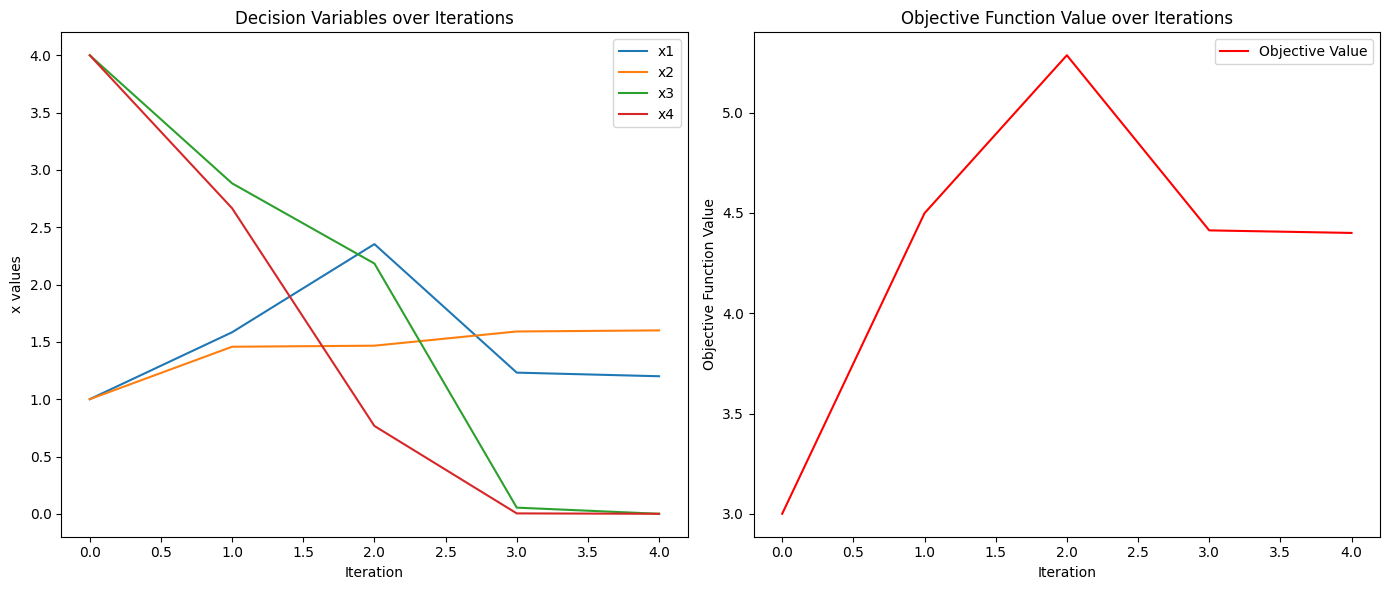

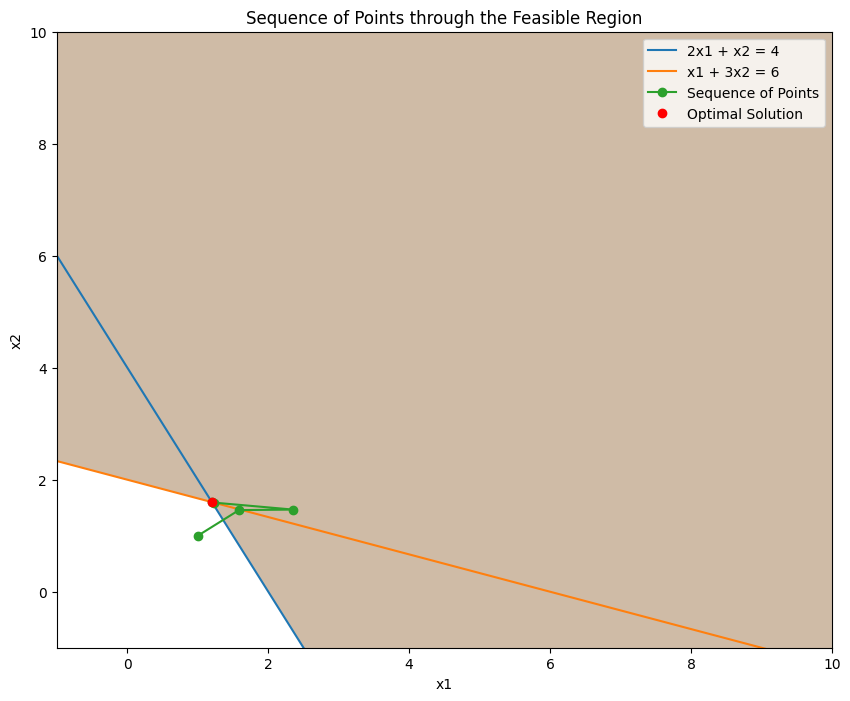

In [17]:
# Outro exemplo de Exercicio com variáveis de folga
# x1 + 2X2
# Restrições 2x1 + x2 >= 4  , x1 + 3x2 > = 6

eps = 1e-3
k = 0
kmax = 100
alpha = 0.1
beta = 0.995
decisao = 0

c = np.array([1, 2,0,0])
A = np.array([[2,1,-1,0],
             [1,3,0,-1],
              ])
b = np.array([4,6])

x = np.array([1,1,4,4])
lam = np.array([0,0])
mu = np.array([1,1,1,1])

m, n = A.shape

x, cotm, x_hist, obj_hist,normpp,normpd,eps = karmakar(A,c,b,x,lam,mu)
x = np.round(x, decimals=2)
cotm = np.round(cotm, decimals=2)

if normpp > eps:
    print("O problema de otimização dado é infactível.") 

elif normpd > eps:
    print("O problema dado não possui solução ótima.")

else:
    print("Valor ótimo da função objetivo: ", cotm)
    print("Ponto onde a função objetiva tem valor ótimo: ",x)

# Plotting the results
x_hist = np.array(x_hist)
iterations = range(len(x_hist))

plt.figure(figsize=(14, 6))

# Plot each component of x over iterations
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(iterations, x_hist[:, i], label=f'x{i+1}')
plt.xlabel('Iteration')
plt.ylabel('x values')
plt.title('Decision Variables over Iterations')
plt.legend()

# Plot objective function value over iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, obj_hist, label='Objective Value', color='r')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the sequence of points through the feasible region
plt.figure(figsize=(10, 8))

# Constraints for plotting
x = np.linspace(-1, 10, 400)
y1 = (b[0] - A[0, 0] * x) / A[0, 1]
y2 = (b[1] - A[1, 0] * x) / A[1, 1]

plt.plot(x, y1, label='2x1 + x2 = 4')
plt.plot(x, y2, label='x1 + 3x2 = 6')

# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)
# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)

# Plot sequence of points
plt.plot(x_hist[:, 0], x_hist[:, 1], 'o-', label='Sequence of Points')

# Plot optimal solution
plt.plot(x_hist[-1, 0], x_hist[-1, 1], 'ro', label='Optimal Solution')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sequence of Points through the Feasible Region')
plt.legend()

O problema de otimização dado é infactível.


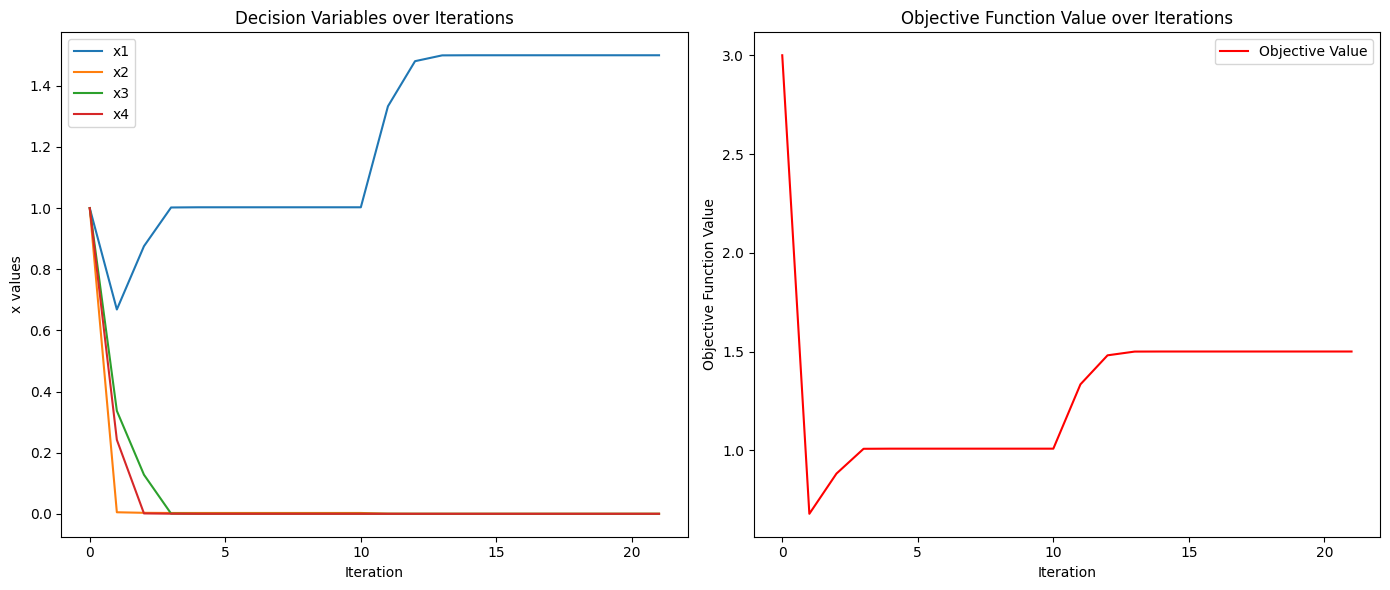

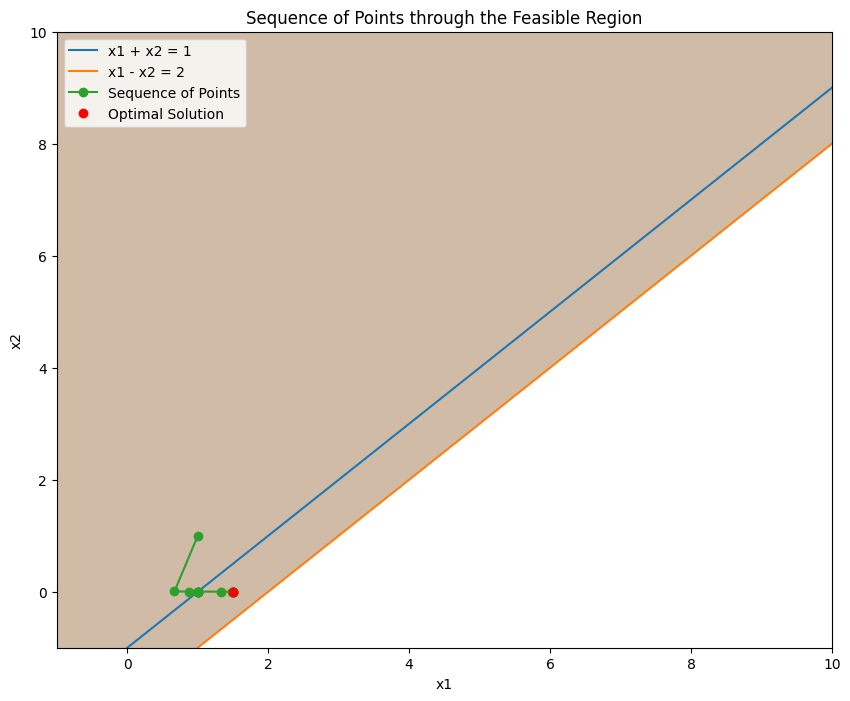

In [19]:
# Exemplo infactivel
# x1 + 2X2
# Restrições x1 + x2 <= 1  , x1 - x2  >= 2

eps = 1e-3
k = 0
kmax = 100
alpha = 0.1
beta = 0.995
decisao = 0

c = np.array([1, 2,0,0])
A = np.array([[1,-1,1,0],
             [1,-1,0,-1]
              ])
b = np.array([1,2])

x = np.array([1,1,1,1])
lam = np.array([0,0])
mu = np.array([1,1,1,1])

m, n = A.shape

x, cotm, x_hist, obj_hist,normpp,normpd,eps = karmakar(A,c,b,x,lam,mu)
x = np.round(x, decimals=2)
cotm = np.round(cotm, decimals=2)

if normpp > eps:
    print("O problema de otimização dado é infactível.") 

elif normpd > eps:
    print("O problema dado não possui solução ótima.")

else:
    print("Valor ótimo da função objetivo: ", cotm)
    print("Ponto onde a função objetiva tem valor ótimo: ",x)

# Plotting the results
x_hist = np.array(x_hist)
iterations = range(len(x_hist))

plt.figure(figsize=(14, 6))

# Plot each component of x over iterations
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(iterations, x_hist[:, i], label=f'x{i+1}')
plt.xlabel('Iteration')
plt.ylabel('x values')
plt.title('Decision Variables over Iterations')
plt.legend()

# Plot objective function value over iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, obj_hist, label='Objective Value', color='r')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the sequence of points through the feasible region
plt.figure(figsize=(10, 8))

# Constraints for plotting
x = np.linspace(-1, 10, 400)
y1 = (b[0] - A[0, 0] * x) / A[0, 1]
y2 = (b[1] - A[1, 0] * x) / A[1, 1]

plt.plot(x, y1, label='x1 + x2 = 1')
plt.plot(x, y2, label='x1 - x2 = 2')

# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)
# Plot feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, y4, 10, where=(y4 < 10), alpha=0.3)

# Plot sequence of points
plt.plot(x_hist[:, 0], x_hist[:, 1], 'o-', label='Sequence of Points')

# Plot optimal solution
plt.plot(x_hist[-1, 0], x_hist[-1, 1], 'ro', label='Optimal Solution')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sequence of Points through the Feasible Region')
plt.legend()